# Project 3 — Data Cleaning ( New York City Airbnb 2019 )

**Internship:** Oasis Infobyte  
**Author:** Riya Prajapati  
**Date:** 2025-10-09  
**Dataset:** https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data 

**Objective**
Clean and preprocess the New York City Airbnb 2019 dataset to ensure data accuracy, consistency, and reliability.
This project demonstrates essential data-cleaning and exploratory-analysis skills, which are key in any data-driven workflow.

**Steps Covered**
1. Import and explore data
2. Assess data quality
3. Clean and preprocess data
4. Feature engineering
5. Exploratory Data Analysis (EDA)
6. Save and document cleaned data
7. Insights and recommendations

## 2. Import Libraries

In [6]:
import pandas as pd        
import numpy as np       
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)


## 3. Load Dataset

In [9]:
file_path = r"C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_3_Cleaning_Data\AB_NYC_2019.csv"
df = pd.read_csv(file_path)

## 4. Initial Data Exploration

In [12]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:\n")
df.info()

Shape: (48895, 16)

Columns:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-nu

In [18]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48895.0,NaN,NaN,NaN,19017143.23618,10983108.38561,2539.0,9471945.0,19677284.0,29152178.5,36487245.0
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


## 5.Initial data audit (missing, duplicates, unique values)

### 5.1 Missing values by column

In [24]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

last_review          10052
reviews_per_month    10052
host_name               21
name                    16
dtype: int64

Shows which columns last_review, reviews_per_month, host_name, and name have missing values.

### 5.2 Duplicates & Unique id check

In [28]:
# Duplicates
print("Total rows:", df.shape[0])
print("Duplicate rows (all columns):", df.duplicated().sum())

# Unique Id
print("Unique ids:", df['id'].nunique())

Total rows: 48895
Duplicate rows (all columns): 0
Unique ids: 48895


There are no duplicate ids. 

## 6. Cleaning: structural & type fixes

### 6.1 Drop fully identical duplicate rows

In [35]:
df.drop_duplicates(keep='first', inplace=True)

Keep first instance of any fully duplicate rows and drop the others.

### 6.2 If multiple rows share same 'id', keep first

In [39]:
df = df.drop_duplicates(subset=['id'], keep='first').reset_index(drop=True)

### 6.3 Conversion of  'Price'  into numeric

In [44]:
df['price'] = (df['price']
               .astype(str)
               .str.replace(r'[\$,]', '', regex=True)
               .replace('', np.nan)
               .astype(float))
df['price'].isnull().sum(), df['price'].dtype

(0, dtype('float64'))

### 6.4 Convert last_review to datetime

In [49]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

### 6.4 Strip whitespace and lowercase/standardize common categorical text

In [54]:
df['room_type'] = df['room_type'].astype(str).str.strip().str.title()
df['neighbourhood_group'] = df['neighbourhood_group'].astype(str).str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].astype(str).str.strip()

## 7. Filling & imputing missing values

### 7.1 Logic-driven fill for reviews_per_month

In [59]:
# If number_of_reviews == 0, reviews_per_month should be 0.
df.loc[df['number_of_reviews'] == 0, 'reviews_per_month'] = 0

# For remaining missing reviews_per_month, fill with median of the column
median_reviews_pm = df['reviews_per_month'].median()
df['reviews_per_month'].fillna(median_reviews_pm, inplace=True)

C:\Users\as\AppData\Local\Temp\ipykernel_22988\528605999.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(median_reviews_pm, inplace=True)


In [61]:
# Check remaining nulls
df[['number_of_reviews','reviews_per_month']].isnull().sum()

number_of_reviews    0
reviews_per_month    0
dtype: int64

This is defensible - zero reviews means rate 0, others imputed with median.

### 7.2 Inspect extreme minimum_nights

In [67]:
df['minimum_nights'].describe()
# Cap unrealistic minimum nights to something reasonable (e.g., 365)
df['minimum_nights'] = df['minimum_nights'].clip(upper=365)

Some listings have very high minimum_nights (like 10000) — capping helps downstream analysis.

### 7.3 Remove rows with lat/lon outside NYC bounding box

In [72]:
# Approx NYC bounds:
min_lat, max_lat = 40.477399, 40.917577
min_long, max_long = -74.25909, -73.700272

mask = (df['latitude'].between(min_lat, max_lat)) & (df['longitude'].between(min_long, max_long))
print("Rows before:", len(df))
df = df[mask].copy().reset_index(drop=True)
print("Rows after lat/lon filter:", len(df))

Rows before: 48895
Rows after lat/lon filter: 48895


Removes listings with coordinates far outside NYC (likely bad data).

## 8. Price outliers

### 8.1 IQR method for price outliers

In [77]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Price IQR limits:", lower, upper)

# Make a filtered copy for EDA (removes extreme prices)
df_iqr = df[(df['price'] >= lower) & (df['price'] <= upper)].copy()
print("Rows after IQR filter:", len(df_iqr))

Price IQR limits: -90.0 334.0
Rows after IQR filter: 45923


This removes only the extreme outliers per standard IQR rule.

### 8.2 Cap prices instead of dropping (keeps rows)

In [81]:
cap_low, cap_high = lower, upper
df['price_capped'] = df['price'].clip(lower=cap_low, upper=cap_high)
df[['price','price_capped']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.0,106.0,175.0,10000.0
price_capped,48895.0,132.979753,83.530504,0.0,69.0,106.0,175.0,334.0


Capping keeps data but reduces extreme influence.

## 9. Feature engineering

### 9.1 Categorize hosts by number of listings (calculated_host_listings_count)

In [88]:
def host_size(x):
    if x <= 1: return 'Solo'
    if x <= 5: return 'Small'
    if x <= 20: return 'Medium'
    return 'Large'

df['host_size'] = df['calculated_host_listings_count'].apply(host_size)
df['host_size'].value_counts()

host_size
Solo      32303
Small     11796
Medium     2591
Large      2205
Name: count, dtype: int64

Small engineered categorical variable useful for grouping.

### 9.2 Create 'days_since_last_review' feature (useful to tell active listings)

In [94]:
today = pd.to_datetime('2019-12-31')  # dataset is 2019, choose an anchor
df['days_since_last_review'] = (today - df['last_review']).dt.days
# For NaT, we can fill with a large number or -1 to indicate "no reviews"
df['days_since_last_review'].fillna(-1, inplace=True)

C:\Users\as\AppData\Local\Temp\ipykernel_22988\3327592465.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_since_last_review'].fillna(-1, inplace=True)


Shows recency; choose an anchor (end of dataset year).

## 10. Basic EDA & charts

### 10.1 Price distribution

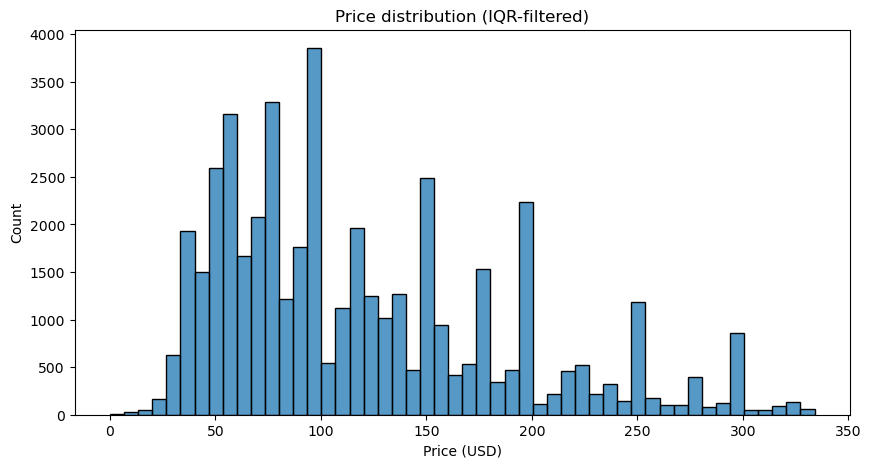

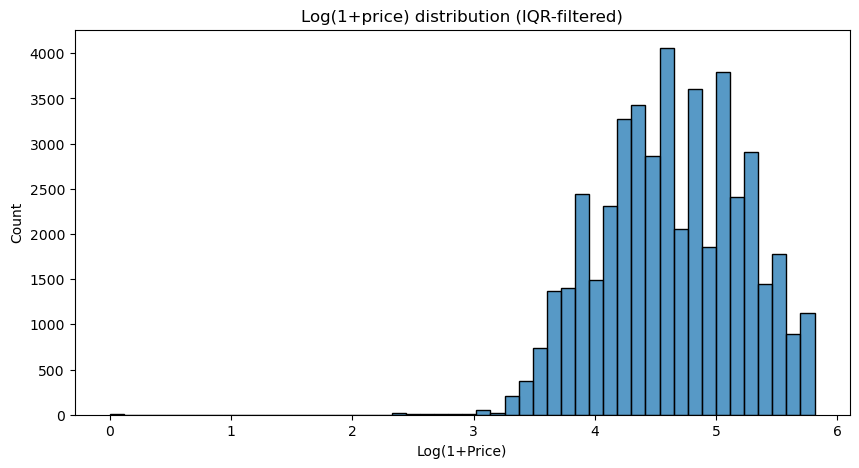

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(df_iqr['price'], bins=50, kde=False)
plt.title('Price distribution (IQR-filtered)')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.show()

# log scale version (useful because price is skewed)
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df_iqr['price']), bins=50)
plt.title('Log(1+price) distribution (IQR-filtered)')
plt.xlabel('Log(1+Price)')
plt.show()

### 10.2 Price by room_type

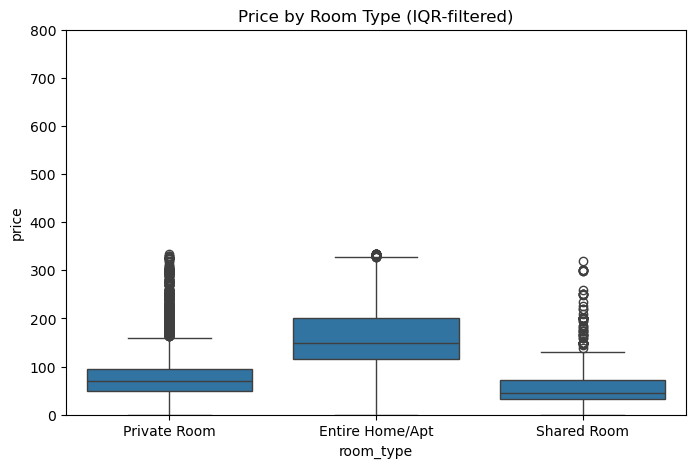

In [104]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df_iqr)
plt.ylim(0, 800)  # limit to make boxes visible; adjust as needed
plt.title('Price by Room Type (IQR-filtered)')
plt.show()

### 10.3 Top 15 neighbourhoods by listing count

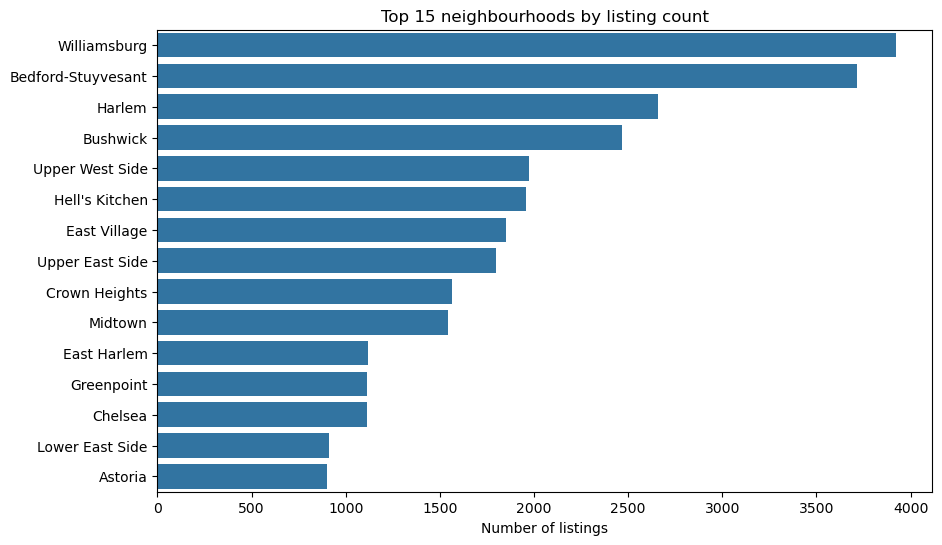

In [109]:
top_neigh = df['neighbourhood'].value_counts().nlargest(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_neigh.values, y=top_neigh.index)
plt.title('Top 15 neighbourhoods by listing count')
plt.xlabel('Number of listings')
plt.ylabel('')
plt.show()

### 10.4 Scatter map of listings (lat/lon) colored by price

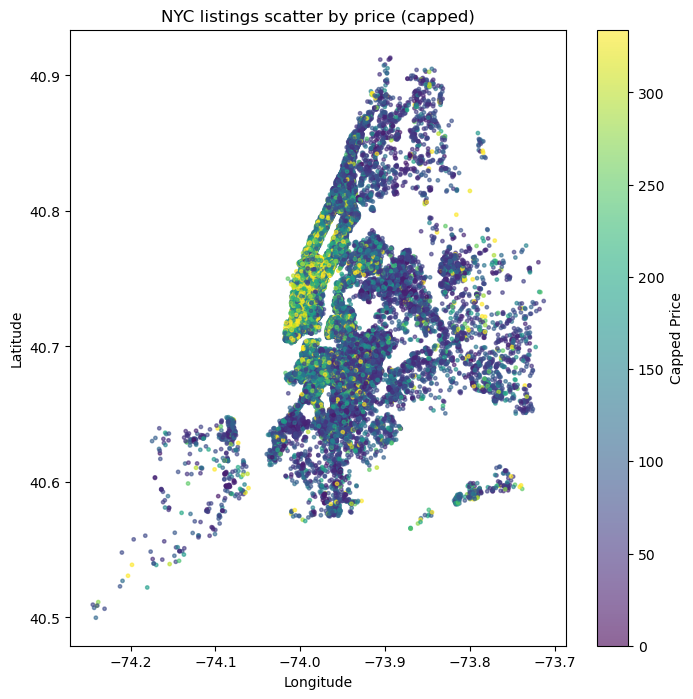

In [114]:
plt.figure(figsize=(8,8))
plt.scatter(df['longitude'], df['latitude'], s=6, c=df['price_capped'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Capped Price')
plt.title('NYC listings scatter by price (capped)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 10.5 Correlation heatmap

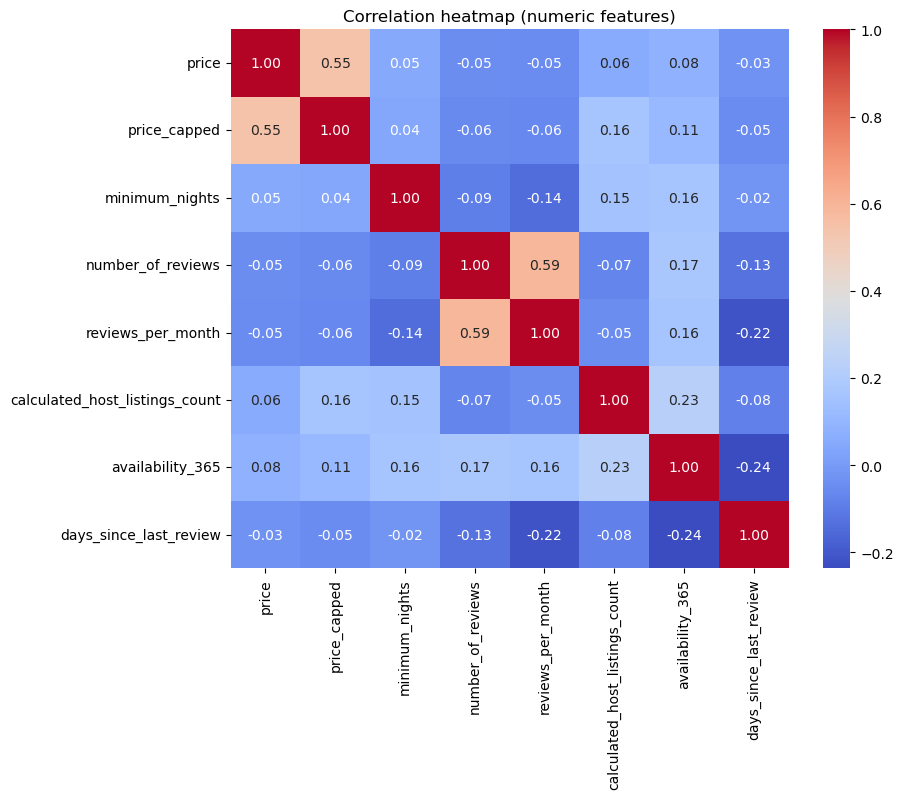

In [117]:
num_cols = ['price','price_capped','minimum_nights','number_of_reviews','reviews_per_month',
            'calculated_host_listings_count','availability_365','days_since_last_review']
plt.figure(figsize=(9,7))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation heatmap (numeric features)')
plt.show()

## 11. Findings
- Cleaned dataset length: <use df.shape after cleaning>.  
- Key cleaning actions: converted price to numeric, parsed dates, filled missing `reviews_per_month` logically (0 if no reviews, median otherwise), removed coordinate outliers, capped extreme prices and minimum nights.  
- Notable insights:
  - Price distribution is heavily right-skewed; most listings are priced under $200.
  - Entire-home listings have higher median prices than private rooms.
  - A few neighbourhoods (Manhattan neighborhoods) dominate by listing count.
- Actions taken for reproducibility:
  - Saved cleaned CSV `AB_NYC_2019_cleaned.csv`.
  - All code and visualizations placed in Jupyter notebook `OIBSIP_Airbnb_Cleaning.ipynb`.


## 12. Save cleaned dataset

In [121]:
clean_path = r"C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_3_Cleaning_Data\AB_NYC_2019_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned CSV to:", clean_path)

Saved cleaned CSV to: C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_3_Cleaning_Data\AB_NYC_2019_cleaned.csv
